# EDA 

In [111]:
## Focus on chromagrams to start
import numpy as np
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
%matplotlib inline

## Train-Test Split - 70%-30%

| Composer  | Label  | 
|:---:|---|
| Beethoven  | 0  |
| Brahms  | 1  |
| Haydn  | 2  |
| Sibelius |3 |
| Tchaikovsky | 4|

## EDA - PCA

In [132]:
chroma = np.load("Data/train_chroma12.npy")
Raff = np.load("Data/train_self-sim.npy")
stft = np.load("Data/train_stft-dB.npy")
mfcc = np.load("Data/train_mfcc13.npy")

## Chromagrams

In [154]:
## Flatten chromagrams for EDA
flatten_chroma = np.reshape(chroma, (chroma.shape[0],chroma.shape[1]*chroma.shape[2]))
flatten_chroma.shape

(5366, 5172)

In [155]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(flatten_chroma)  
print(pca.explained_variance_ratio_)
X_embedded = pca.fit_transform(flatten_chroma)

[0.03709972 0.03365156]


In [156]:
import matplotlib.style as style
plt.rcParams.update({'font.size': 18})
style.use('seaborn-darkgrid')

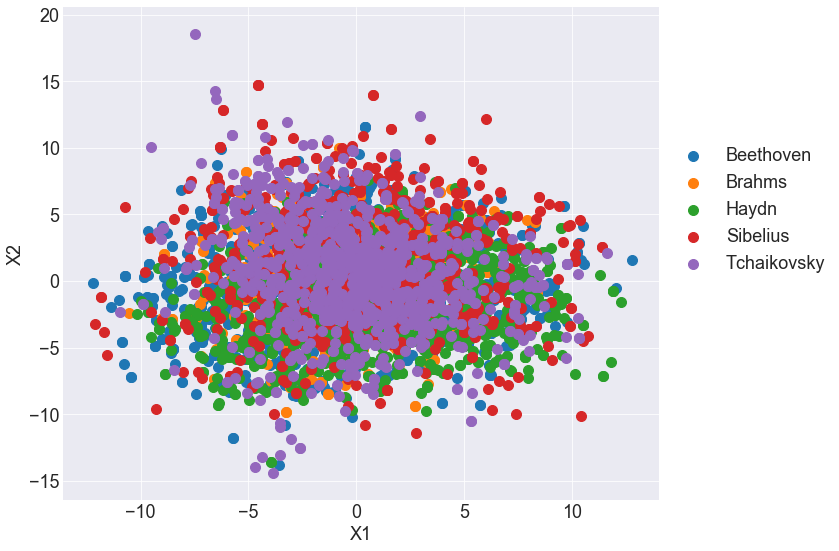

In [157]:
cdict = {0: 'C0', 1: 'C1', 2: 'C2', 3: 'C3', 4: 'C4'}
composers = ["Beethoven", "Brahms", "Haydn", "Sibelius", "Tchaikovsky"]
fig, ax = plt.subplots(figsize = (12,8))
for g in np.unique(train_labels):
    ix = np.where(train_labels == g)
    ax.scatter(X_embedded[ix, 0], X_embedded[ix, 1], c = cdict[g], label = composers[g], s = 100)
ax.legend(bbox_to_anchor=(1, 0.75))
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.savefig('Plots/EDA-PCA-chroma12.png')
plt.show()

## MFCC-13

In [158]:
flatten_mfcc = np.reshape(mfcc, (mfcc.shape[0],mfcc.shape[1]*mfcc.shape[2]))
flatten_mfcc.shape
pca.fit(flatten_mfcc)  
print(pca.explained_variance_ratio_)
X_embedded = pca.fit_transform(flatten_mfcc)

[0.70937588 0.08541824]


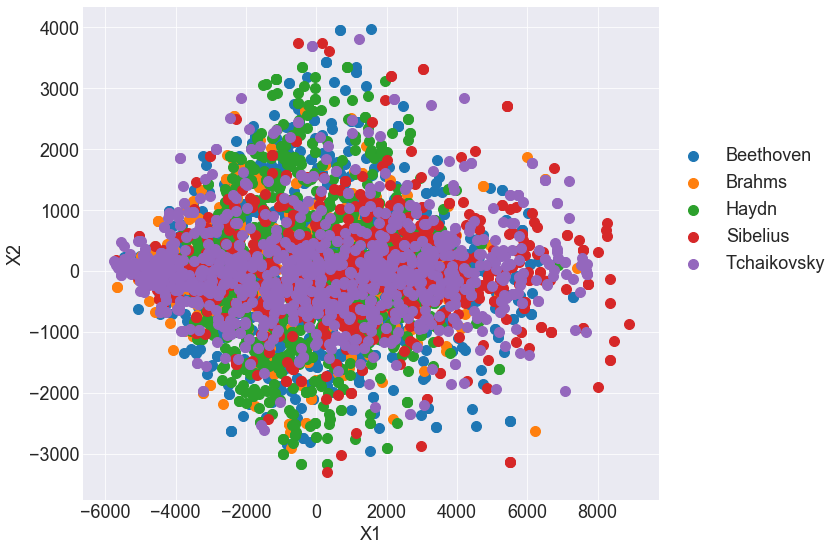

In [159]:
cdict = {0: 'C0', 1: 'C1', 2: 'C2', 3: 'C3', 4: 'C4'}
composers = ["Beethoven", "Brahms", "Haydn", "Sibelius", "Tchaikovsky"]
fig, ax = plt.subplots(figsize = (12,8))
for g in np.unique(train_labels):
    ix = np.where(train_labels == g)
    ax.scatter(X_embedded[ix, 0], X_embedded[ix, 1], c = cdict[g], label = composers[g], s = 100)
ax.legend(bbox_to_anchor=(1, 0.75))
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.savefig('Plots/EDA-PCA-mfcc13.png')
plt.show()

## STFT

In [160]:
flatten_stft = np.reshape(stft, (stft.shape[0],stft.shape[1]*stft.shape[2]))
flatten_stft.shape
pca.fit(flatten_stft)  
print(pca.explained_variance_ratio_)
X_embedded = pca.fit_transform(flatten_stft)

[0.30997842 0.11361153]


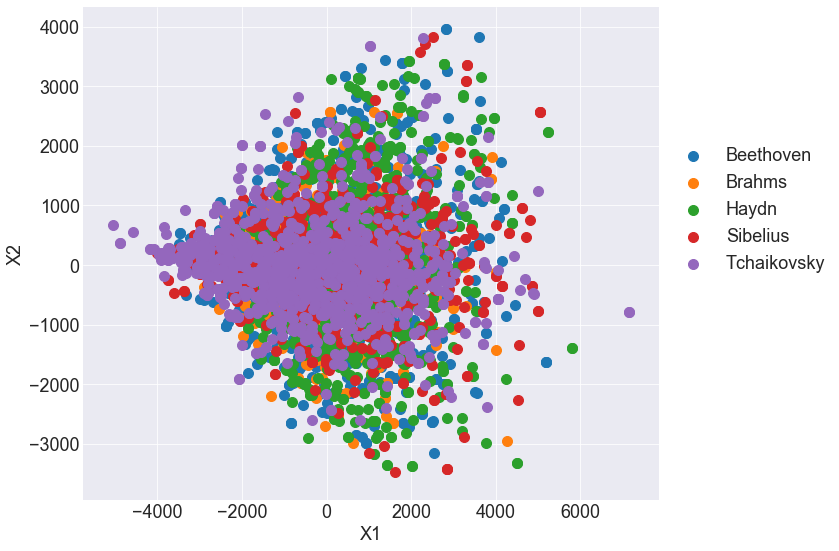

In [161]:
cdict = {0: 'C0', 1: 'C1', 2: 'C2', 3: 'C3', 4: 'C4'}
composers = ["Beethoven", "Brahms", "Haydn", "Sibelius", "Tchaikovsky"]
fig, ax = plt.subplots(figsize = (12,8))
for g in np.unique(train_labels):
    ix = np.where(train_labels == g)
    ax.scatter(X_embedded[ix, 0], X_embedded[ix, 1], c = cdict[g], label = composers[g], s = 100)
ax.legend(bbox_to_anchor=(1, 0.75))
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.savefig('Plots/EDA-PCA-stft.png')
plt.show()

In [164]:
chroma.shape

(5366, 12, 431)

In [165]:
stft.shape

(5366, 128, 431)

In [166]:
mfcc.shape

(5366, 13, 431)

In [167]:
Raff.shape

(5366, 431, 431)

## UMAP

In [168]:
import umap.umap_ as umap

In [169]:
reducer = umap.UMAP(n_neighbors=50, min_dist = 0.5, metric = "cosine")
embedding = reducer.fit_transform(flatten_chroma)
embedding.shape

(5366, 2)

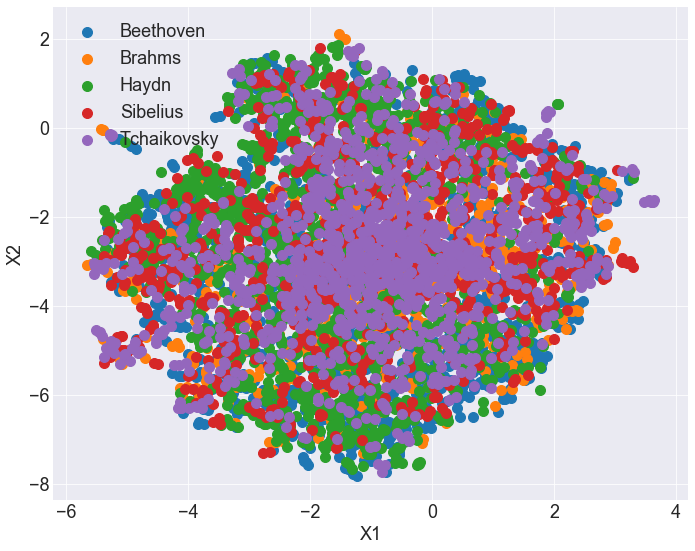

In [170]:
cdict = {0: 'C0', 1: 'C1', 2: 'C2', 3: 'C3', 4: 'C4'}
composers = ["Beethoven", "Brahms", "Haydn", "Sibelius", "Tchaikovsky"]
fig, ax = plt.subplots(figsize = (10,8))
for g in np.unique(train_labels):
    ix = np.where(train_labels == g)
    ax.scatter(embedding[ix, 0], embedding[ix, 1], c = cdict[g], label = composers[g], s = 100)
ax.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.savefig('Plots/EDA-UMAP-chroma12.png')
plt.show()